In [59]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import numpy as np
from datetime import datetime
import time
import seaborn

In [2]:
os.chdir(r'C:\Users\renoi\GH_DynamicData')

product = pd.read_csv('pruduct.csv', encoding='utf-8')
session = pd.read_csv('Session.csv', encoding='utf-8')
search1 = pd.read_csv('Search1.csv', encoding='utf-8')
search2 = pd.read_csv('Search2.csv', encoding='utf-8')
custom =  pd.read_csv('custom.csv', encoding='utf-8')
master =  pd.read_csv('Master.csv', encoding='utf-8')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# 브랜드 변수에서 특수문자 제거
product['PD_BRA_NM'] = list(map(lambda x:re.sub("[[,\](,)\s]", "", x), product['PD_BRA_NM']))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Possible nested set at position 1
  


In [4]:
# 구매가격 변수를 str -> int 변환.
product['PD_BUY_AM'] = list(map(lambda x:x.replace(",",""),product['PD_BUY_AM']))
product['PD_BUY_AM'] = product['PD_BUY_AM'].astype(int)

# 구매개수 변수를 str&int -> int로 변환.
product['PD_BUY_CT'] = product['PD_BUY_CT'].astype(str)
product['PD_BUY_CT'] = list(map(lambda x:x.replace(",",""),product['PD_BUY_CT']))
product['PD_BUY_CT'] = product['PD_BUY_CT'].astype(int)

In [5]:
# product를 CLNT_ID 순으로 정렬
product = product.sort_values(by=['CLNT_ID'], axis=0)

In [6]:
## product에 새로운 열 "TOT_AM" 생성 (PD_BUY_AM는 제품 하나 당 개수이므로, 이를 구매한 제품의 갯수와 곱한 "총 지출 금액"이 "TOT_AM"임)
product["TOT_AM"] = product["PD_BUY_AM"] * product["PD_BUY_CT"]

In [7]:
# CLNT_ID와 SESS_ID에 대해 오름차순 정렬
session = session.sort_values(by=['CLNT_ID', 'SESS_ID'], axis=0)
product = product.sort_values(by=['CLNT_ID', 'SESS_ID'], axis=0)

In [8]:
# session을 기준으로, session과 product를 합침
raw = pd.merge(session, product, how='left', on = ['CLNT_ID', 'SESS_ID'])

In [9]:
# tot_list: CLNT_ID와 SESS_ID가 모두 같은 행들을 "TOT_AM"에 대해 합계를 구한 것(즉, 한 고객이 한 세션에서 구매한 금액의 총액임)
tot_list = product.groupby(['CLNT_ID', 'SESS_ID'])['TOT_AM'].agg('sum').tolist()

In [10]:
# session에 "BUY_TOT_AM"라는 새로운 열 생성 (한 고객이 한 세션에서 구매한 금액의 총액)
session["BUY_TOT_AM"] = tot_list

In [11]:
session.sort_values(by=['CLNT_ID', 'SESS_ID'], ascending=[True, False], inplace=True)

In [13]:
session['SESS_DT'] = session['SESS_DT'].astype('str')
session['SESS_DT'] = list(map(lambda x:datetime.strptime(x, '%Y%m%d'), session['SESS_DT']))
session['Timestamp'] = list(map(lambda x:datetime.timestamp(x), session['SESS_DT']))

In [14]:
# session에 "TimeDiff"라는 새로운 열 생성 (구매한 세션 간의 시간 간격)
session['TimeDiff'] = session.groupby(['CLNT_ID'])['SESS_DT'].diff()

In [38]:
# TimeDiff(구매한 세션 간의 시간 간격)을 "day(일)"의 단위로 변경
session['TimeDiff'] = session['TimeDiff'].astype('timedelta64[D]')

In [70]:
session.head(50)

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,BUY_TOT_AM,TimeDiff,Timestamp
1398652,8,7017688,2,2018-06-05,55.0,468,mobile,Seoul,Seoul,38000,NaN,1.528124e+09
172344,8,6964877,7,2018-06-06,38.0,366,mobile,Gyeonggi-do,Gwangmyeong-si,38000,1.0,1.528211e+09
1435369,14,1156991,5,2018-09-11,256.0,"7,098",mobile,Gyeonggi-do,Ansan-si,69800,NaN,1.536592e+09
142973,25,9506206,111,2018-04-25,12.0,242,desktop,Gyeonggi-do,Hwaseong-si,92000,NaN,1.524582e+09
142970,25,8113243,160,2018-05-18,28.0,"1,540",desktop,Gyeonggi-do,Osan-si,92000,23.0,1.526569e+09
142971,25,6059256,204,2018-06-21,7.0,99,desktop,Gyeonggi-do,Osan-si,47000,34.0,1.529507e+09
142972,25,5317297,213,2018-07-03,33.0,865,desktop,Gyeonggi-do,Hwaseong-si,39800,12.0,1.530544e+09
777662,32,1136737,99,2018-09-11,81.0,"2,883",mobile,Busan,Busan,57000,NaN,1.536592e+09
777663,32,759569,105,2018-09-17,124.0,"1,098",mobile,Busan,Busan,19800,6.0,1.537110e+09
617636,33,10548225,2,2018-04-07,48.0,"1,776",desktop,Seoul,Seoul,49000,NaN,1.523027e+09


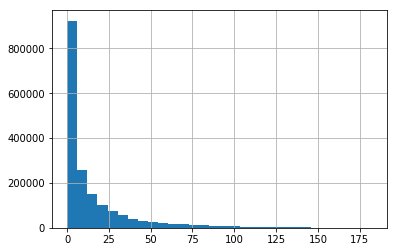

In [45]:
# TimeDiff (구매한 세션 간의 간격 - 일(day) 단위)
session['TimeDiff'].hist(bins=30)

In [43]:
session['TimeDiff'].describe()

count    1.790170e+06
mean     1.563015e+01
std      2.360767e+01
min      0.000000e+00
25%      2.000000e+00
50%      6.000000e+00
75%      1.900000e+01
max      1.820000e+02
Name: TimeDiff, dtype: float64

In [49]:
# BUY_TOT_AM (한 고객의 한 세션에서의 총 구매 금액)
session['BUY_TOT_AM'].describe()

count    2.712907e+06
mean     1.001855e+05
std      2.372877e+05
min      1.000000e+01
25%      2.840000e+04
50%      5.280000e+04
75%      1.036000e+05
max      6.220000e+07
Name: BUY_TOT_AM, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x278889506d8>,
 'caps': [<matplotlib.lines.Line2D at 0x27888950f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x278889500b8>],
 'medians': [<matplotlib.lines.Line2D at 0x27888959898>],
 'fliers': [<matplotlib.lines.Line2D at 0x27888959cf8>],
 'means': []}

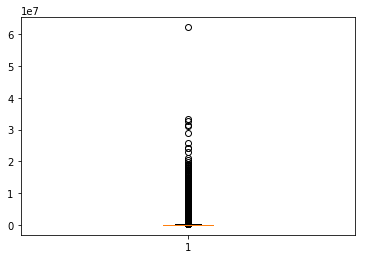

In [58]:
plt.boxplot(session['BUY_TOT_AM'])  # outlier 존재

(array([6.7654e+05, 3.5100e+02, 5.1000e+01, 1.1000e+01, 3.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  103610.,  6313249., 12522888., 18732527., 24942166., 31151805.,
        37361444., 43571083., 49780722., 55990361., 62200000.]),
 <a list of 10 Patch objects>)

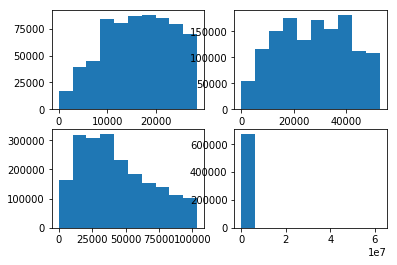

In [81]:
# 구매금액(BUY_TOT_AM)의 분포

plt.subplot(221) 
plt.hist(session[session['BUY_TOT_AM']<np.percentile(session['BUY_TOT_AM'], 25)]['BUY_TOT_AM'])

plt.subplot(222)
plt.hist(session[session['BUY_TOT_AM']<np.percentile(session['BUY_TOT_AM'], 50)]['BUY_TOT_AM'])

plt.subplot(223)
plt.hist(session[session['BUY_TOT_AM']<np.percentile(session['BUY_TOT_AM'], 75)]['BUY_TOT_AM'])

plt.subplot(224)
plt.hist(session[session['BUY_TOT_AM']>np.percentile(session['BUY_TOT_AM'], 75)]['BUY_TOT_AM'])

(array([3.01938e+05, 5.13830e+04, 2.14900e+04, 1.24470e+04, 7.21600e+03,
        4.64700e+03, 2.67600e+03, 1.56400e+03, 8.02000e+02, 2.39000e+02]),
 array([  0. ,  18.2,  36.4,  54.6,  72.8,  91. , 109.2, 127.4, 145.6,
        163.8, 182. ]),
 <a list of 10 Patch objects>)

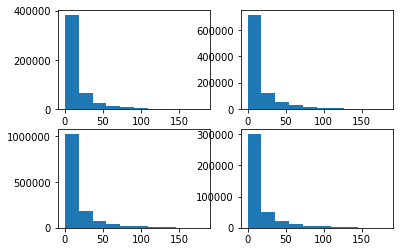

In [82]:
## BUY_TOT_AM(구매금액)의 구간 별로 나눴을 때, TimeDIff(구매 시간 간격)의 분포

plt.subplot(221) 
plt.hist(session[session['BUY_TOT_AM']<np.percentile(session['BUY_TOT_AM'], 25)]['TimeDiff'].dropna())

plt.subplot(222)
plt.hist(session[session['BUY_TOT_AM']<np.percentile(session['BUY_TOT_AM'], 50)]['TimeDiff'].dropna())

plt.subplot(223)
plt.hist(session[session['BUY_TOT_AM']<np.percentile(session['BUY_TOT_AM'], 75)]['TimeDiff'].dropna())

plt.subplot(224)
plt.hist(session[session['BUY_TOT_AM']>np.percentile(session['BUY_TOT_AM'], 75)]['TimeDiff'].dropna())

In [87]:
session[session['BUY_TOT_AM']>np.percentile(session['BUY_TOT_AM'], 99.9)]

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,BUY_TOT_AM,TimeDiff,Timestamp
1423077,11455,1916682,80,2018-08-29,266.0,"8,805",mobile,Busan,Busan,4120000,NaN,1.535468e+09
1427792,20030,7481873,6,2018-05-28,20.0,"3,159",desktop,Gyeonggi-do,Seongnam-si,8745000,NaN,1.527433e+09
1427793,20030,6787831,34,2018-06-09,10.0,651,desktop,Gyeonggi-do,Seongnam-si,3922500,1.0,1.528470e+09
1282234,20632,4094812,54,2018-07-23,28.0,"1,801",mobile,Seoul,Seoul,3787000,46.0,1.532272e+09
975253,23506,3909357,548,2018-07-26,90.0,"2,540",mobile,Seoul,Seoul,2928100,6.0,1.532531e+09
726671,27122,3308790,6,2018-08-05,164.0,"1,142",mobile,Seoul,Seoul,3413520,NaN,1.533395e+09
1007360,30102,894494,20,2018-09-15,125.0,853,mobile,Seoul,Seoul,4378000,NaN,1.536937e+09
1402209,35232,3094854,107,2018-08-09,39.0,786,mobile,Seoul,Seoul,4340000,NaN,1.533740e+09
1349216,37869,6622442,3,2018-06-11,112.0,"4,790",desktop,Seoul,Seoul,6636000,NaN,1.528643e+09
1349218,37869,6497403,4,2018-06-13,48.0,908,desktop,Seoul,Seoul,3204000,2.0,1.528816e+09


In [88]:
product.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,TOT_AM
4830541,8,6964877,40,206218,색상:BLACK|사이즈:ONE SIZE / 1개,플라넷비,38000,1,38000
4855606,8,7017688,74,206218,색상:BLACK|사이즈:ONE SIZE / 1개,플라넷비,38000,1,38000
5015932,14,1156991,284,369141,색상:LL2G16216RGB|사이즈:FREE / 1개,로이드,39900,1,39900
4386392,14,1156991,284,645262,색상:LL1G14817AIN|사이즈:FREE / 1개,로이드주얼리,29900,1,29900
56434,25,5317297,8,598634,피테로마 때박살:피테로마 때박살 120종,유씨지,39800,1,39800
